### DestVI annotation tutorial         
In this tutorial, we through the steps of applying DestVI for deconvolution of spatial transcriptomics profiles using an accompanying single-cell RNA sequencing data.  

#### Import packages

In [1]:
import os 
import sys
sys.path.append(os.getcwd())

import scanpy as sc
import stereoAlign

#### loading and preprocessing

In [2]:
sc_data = sc.read_h5ad("data/scRNA-LN-compressed.h5ad")
st_data = sc.read_h5ad("data/ST-LN-compressed.h5ad")

In [5]:
sc.pp.filter_genes(sc_data, min_counts=10)
sc_data.layers["counts"] = sc_data.X.copy()
sc.pp.normalize_total(sc_data, target_sum=10e4)
sc.pp.log1p(sc_data)
sc_data.raw = sc_data

In [6]:
st_data.layers["counts"] = st_data.X.copy()
st_data.obsm["spatial"] = st_data.obsm["location"]

sc.pp.normalize_total(st_data, target_sum=10e4)
sc.pp.log1p(st_data)
st_data.raw = st_data

#### annotation by `DestVI`

In [8]:
res = stereoAlign.ann.destVI_annotation(single_adata=sc_data, 
                                        spatial_adata=st_data, 
                                        annotation="broad_cell_types")

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


Anndata setup with scvi-tools version 0.17.0.

Setup via `CondSCVI.setup_anndata` with arguments:

{'labels_key': 'broad_cell_types', 'layer': 'counts'}

     Summary Statistics     
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Summary Stat Key ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│      n_vars      │ 11723 │
│     n_cells      │ 14989 │
│     n_labels     │  12   │
└──────────────────┴───────┘

               Data Registry                
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃    scvi-tools Location    ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │  adata.layers['counts']   │
│    labels    │ adata.obs['_scvi_labels'] │
└──────────────┴───────────────────────────┘

                         labels State Registry                         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃        Source Location        ┃  Categories   ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['broad_cell_types'] │    B cells    │          0          │
│                               │  CD4 T cells  │          1          │
│                               │  CD8 T cells  │          2          │
│                               │  GD T cells   │          3          │
│                               │  Macrophages  │          4          │
│                               │ Migratory DCs │          5          │
│                               │   Monocytes   │          6          │
│                               │   NK cells    │          7          │
│                               │     Tregs     │          8          │
│                               │     cDC1s     │          9          │
│                               │     cDC2s     │         10          │
│                               │     pDCs      │         11          │
└───────────────────────────────┴───────────────┴─────────────────────┘

/home/zhangchao/anaconda3/envs/scib/lib/python3.8/site-packages/scvi/model/base/_training_mixin.py:67: UserWarning: max_epochs=300 is less than n_epochs_kl_warmup=400. The max_kl_weight will not be reached during training.
  warnings.warn(
/home/zhangchao/anaconda3/envs/scib/lib/python3.8/site-packages/torch/cuda/__init__.py:152: UserWarning: 
    Found GPU1 NVIDIA GeForce GT 730 which is of cuda capability 3.5.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability supported by this library is 3.7.
    
  warnings.warn(old_gpu_warn % (d, name, major, minor, min_arch // 10, min_arch % 10))
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 300/300: 100%|██| 300/300 [09:17<00:00,  1.86s/it, loss=5.47e+03, v_num=1]


Anndata setup with scvi-tools version 0.17.0.

Setup via `DestVI.setup_anndata` with arguments:

{'layer': 'counts'}

     Summary Statistics     
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Summary Stat Key ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│      n_vars      │ 11723 │
│     n_cells      │ 1092  │
└──────────────────┴───────┘

              Data Registry              
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃  scvi-tools Location   ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │ adata.layers['counts'] │
│    ind_x     │ adata.obs['_indices']  │
└──────────────┴────────────────────────┘

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
/home/zhangchao/anaconda3/envs/scib/lib/python3.8/site-packages/pytorch_lightning/trainer/trainer.py:1933: PossibleUserWarning: The number of training batches (9) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Epoch 2500/2500: 100%|█| 2500/2500 [09:10<00:00,  4.54it/s, loss=1.19e+07, v_num


#### visualization

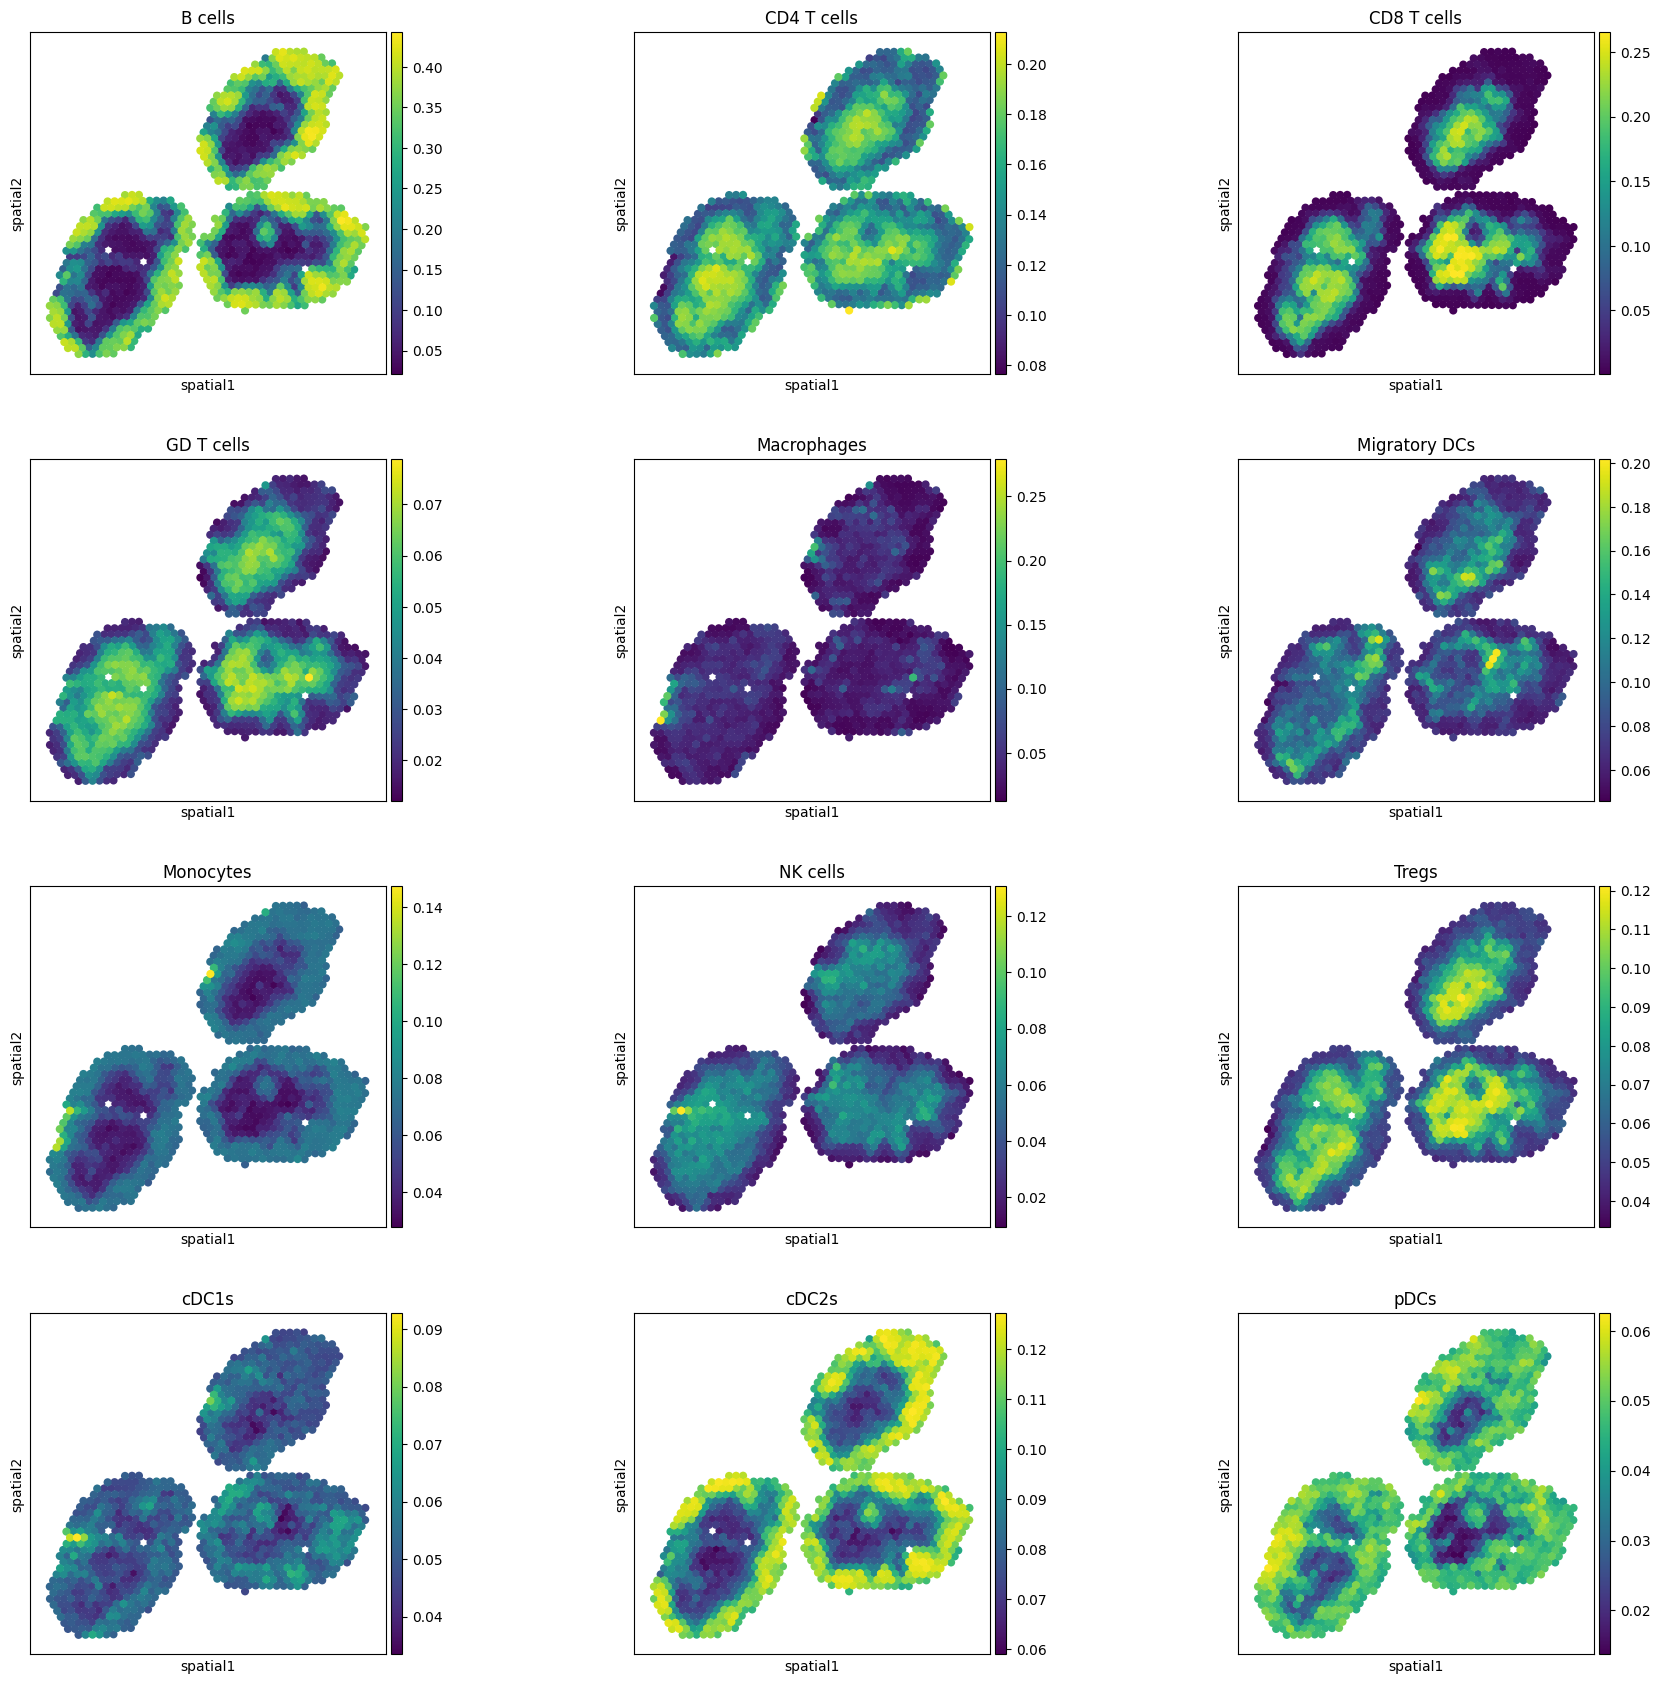

In [16]:
sc.pl.spatial(res, color=sc_data.obs["broad_cell_types"].cat.categories, spot_size=200, ncols=3)